In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
src_dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/results/pw'
file_names = os.listdir(src_dir_path)

In [25]:
kwrds_in = []
kwrds_ex = []

In [26]:
base_params = ['dt', 'el', 'tt', 'ds', 'ge']

In [27]:
params_paths = []
for file_name in file_names:
    file_path = os.path.join(src_dir_path, file_name)
    postfixs = file_name.split('.')[0].split('_')[-1].split('-')
    if len(postfixs) == len(base_params) and postfixs[0].startswith('dt'):
        params_paths.append((file_path, postfixs))
print(len(params_paths))

32


In [32]:
# generate a Dataframe
analysis_df = pd.DataFrame(columns=['param', 'dt', 'el', 'tt', 'ds', 'ge', 'VUS-PR', 'Time'])
for file_path, postfixs in params_paths:
    df = pd.read_csv(file_path)
    # get mean 'VUS-PR'
    mean_vus_pr = df['VUS-PR'].mean()
    # get total 'Time'
    total_time = df['Time'].sum()
    # create a new row with the parameters and results
    str_param = '-'.join(postfixs)
    analysis_df.loc[len(analysis_df)] = {
        'param': str_param,
        'dt': postfixs[0][-1],
        'el': postfixs[1][-1],
        'tt': postfixs[2][-1],
        'ds': postfixs[3][-1],
        'ge': postfixs[4][-1],
        'VUS-PR': mean_vus_pr,
        'Time': total_time
    }

In [34]:
group_cols = ['dt', 'el', 'tt', 'ds', 'ge']

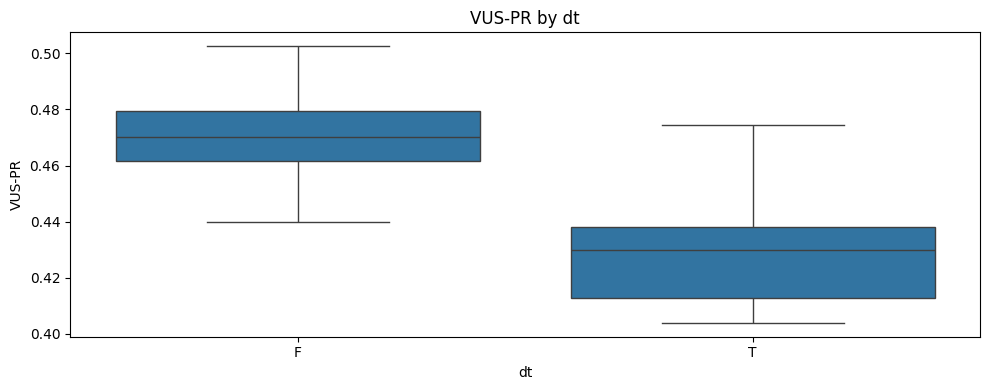

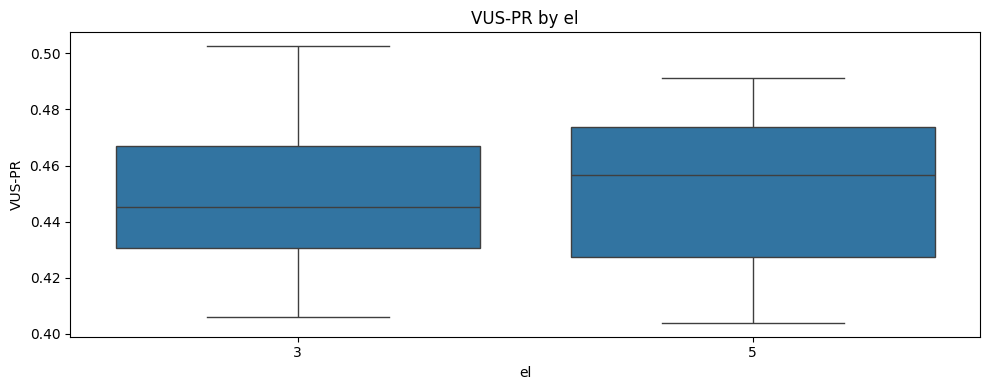

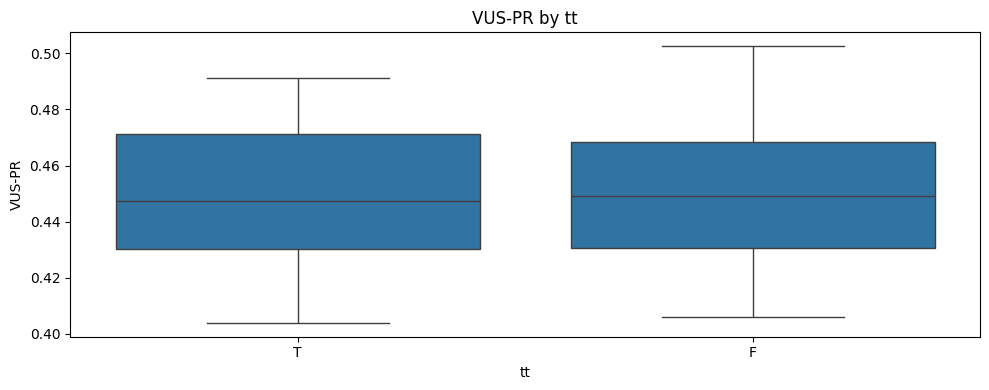

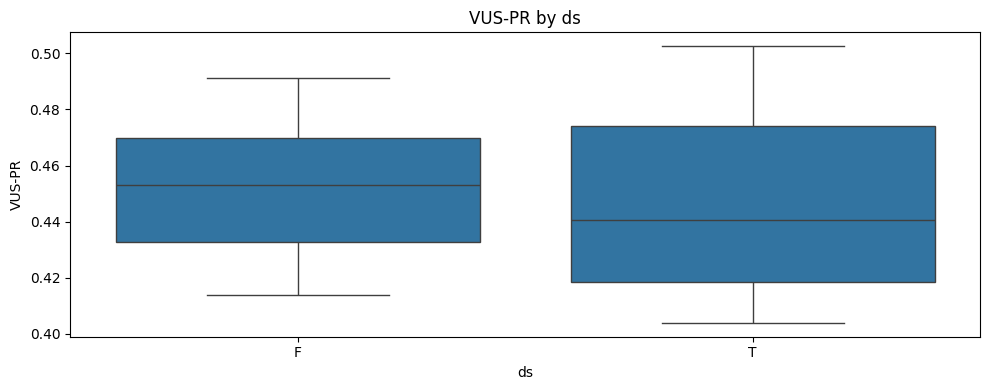

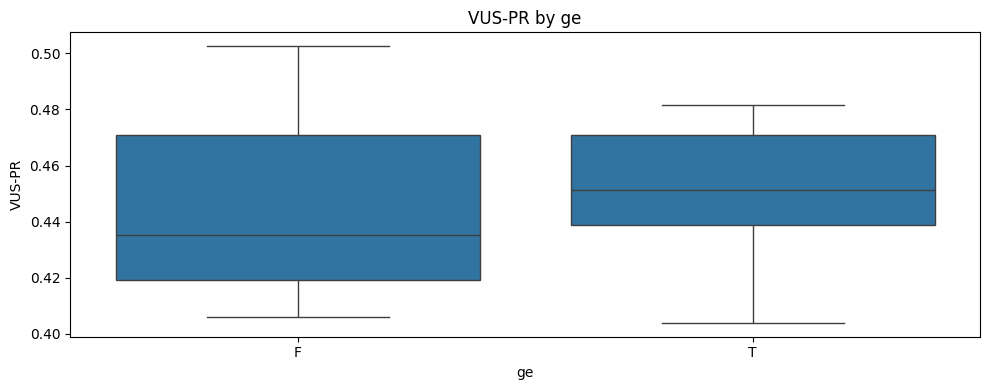

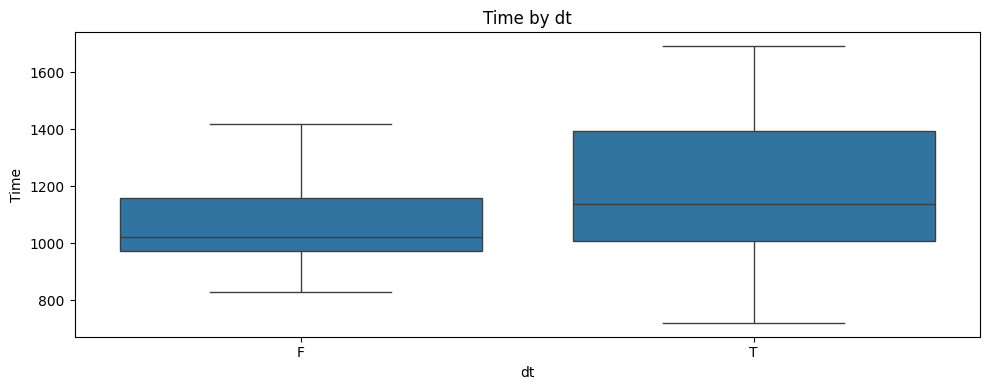

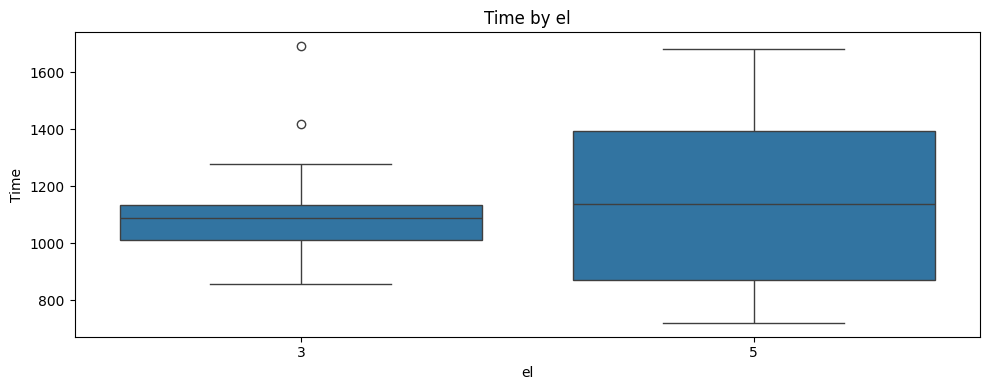

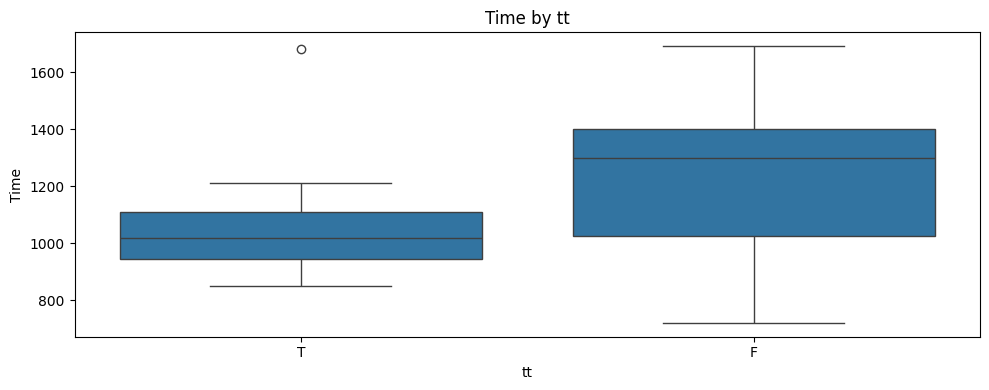

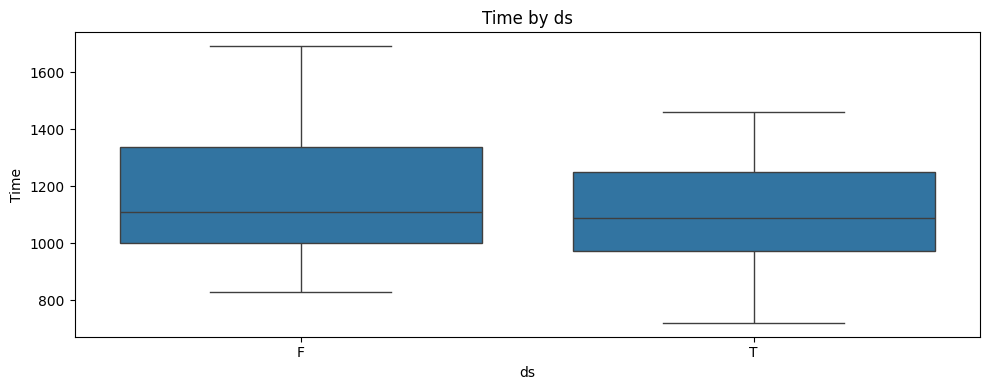

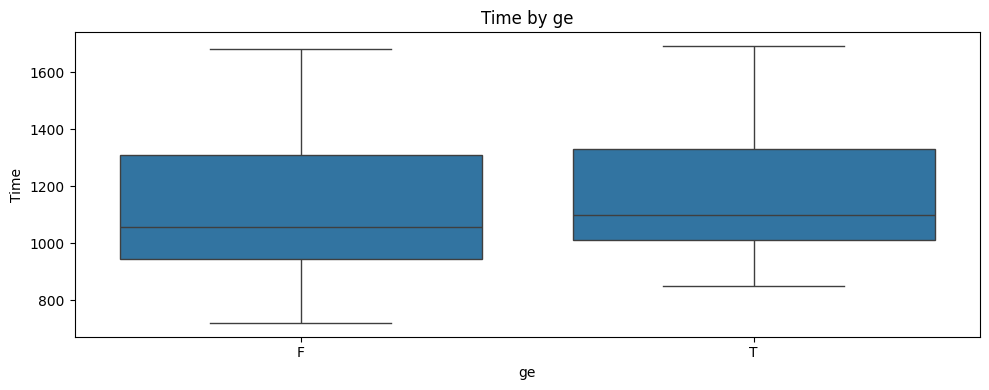

In [36]:
for col in group_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=analysis_df, x=col, y='VUS-PR')
    plt.title(f"VUS-PR by {col}")
    plt.tight_layout()
    plt.show()

# same for 'Time'
for col in group_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=analysis_df, x=col, y='Time')
    plt.title(f"Time by {col}")
    plt.tight_layout()
    plt.show()